### Hello all in this notebook i will be doing EDA On the Electric vehicle population data, i have used various visualizations to represent data in an appealing way, Please do leave an upvote if you like my work

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('/kaggle/input/electric-vehicle-population-data/Electric_Vehicle_Population_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


Drop few columns that are not important for our study such as VIN,POSTAL CODE,BASE MSRP,LEGISLATICE DISTRICT,DOL VEHICLE ID,ELECTIRIC UTILITY,2020 CENSUS TRACT

In [5]:
df.drop(['VIN (1-10)','Postal Code','Base MSRP','Legislative District','DOL Vehicle ID','Electric Utility','2020 Census Tract'],axis=1,inplace=True)

In [6]:
df.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Vehicle Location
0,Monroe,Key West,FL,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,POINT (-81.80023 24.5545)
1,Clark,Laughlin,NV,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,POINT (-114.57245 35.16815)
2,Yakima,Yakima,WA,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,POINT (-120.50721 46.60448)
3,Skagit,Concrete,WA,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,POINT (-121.7515 48.53892)
4,Snohomish,Everett,WA,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,POINT (-122.20596 47.97659)


In [7]:
df.shape

(112634, 10)

In [8]:
df.isna().sum()

County                                                0
City                                                  0
State                                                 0
Model Year                                            0
Make                                                  0
Model                                                20
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Vehicle Location                                     24
dtype: int64

A very few data points are missing so we can remove them 

In [9]:
df = df.dropna()

In [10]:
#Lets check from which county we have more entries from (Top 10)

Counties = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].values

px.bar(x=list(Counties)[:10],y=values[:10],labels={'x':"County Name",'y':"Number of Cars"},color=values[:10])

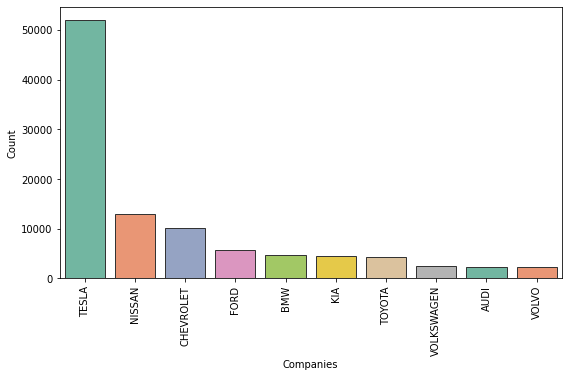

In [11]:
#lets see which company makes most of the electric vehicles
Companies = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Companies)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation='90')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

In [12]:
px.pie(names=list(Companies)[:10],values=values[:10],width=500,height=400)

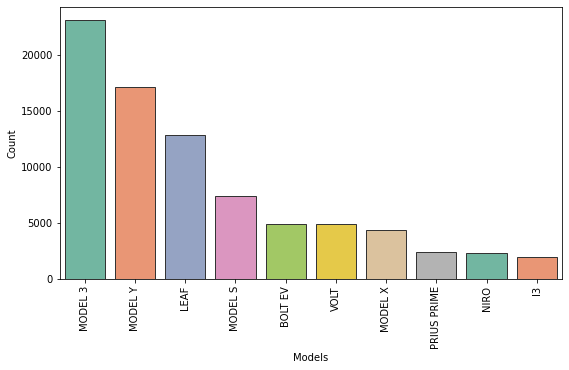

In [13]:
#Top 10 models in use

Models = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Models)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation='90')
plt.xlabel('Models')
plt.ylabel('Count')
plt.show()

In [14]:
#what are the most sold models per each company
#lets consider the top 10 companies
top_10_companies = list(Companies)[:10]
for i in top_10_companies:
    data = df[df['Make']==i]
    data = data.groupby('Model').count().sort_values(by='City',ascending=False).index
    print('Top selling model for',i,'is ----------->',data[0])

Top selling model for TESLA is -----------> MODEL 3
Top selling model for NISSAN is -----------> LEAF
Top selling model for CHEVROLET is -----------> BOLT EV
Top selling model for FORD is -----------> FUSION
Top selling model for BMW is -----------> I3
Top selling model for KIA is -----------> NIRO
Top selling model for TOYOTA is -----------> PRIUS PRIME
Top selling model for VOLKSWAGEN is -----------> ID.4
Top selling model for AUDI is -----------> E-TRON
Top selling model for VOLVO is -----------> XC90


In [15]:
#Percentage of BEV vs PHEV

Vehicle_type = list(df.groupby('Electric Vehicle Type').count()['County'].index)
values = df.groupby('Electric Vehicle Type').count()['County'].values

px.pie(names=Vehicle_type,values=values,height=400)

In [16]:
#lets see whats the percentage of top 10 companies vehicles are BEV and PHEV

for index,i in enumerate(top_10_companies):
    data = df[df['Make']==i]
    labels = list(data.groupby('Electric Vehicle Type').count()['City'].index)
    values = list(data.groupby('Electric Vehicle Type').count()['City'].values)
    fig = px.pie(names=labels,values=values,width=700,height=400,title=str(i))
    fig.show()

<AxesSubplot:xlabel='Electric Range', ylabel='Count'>

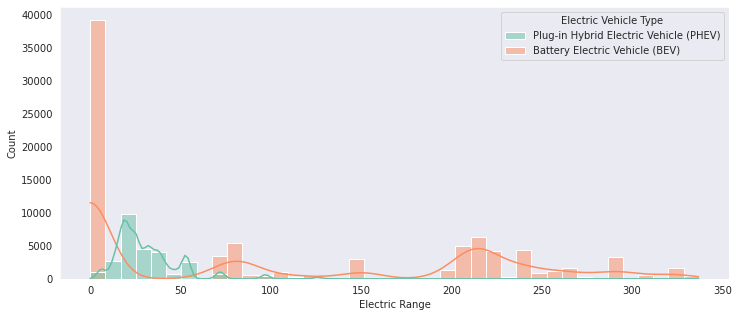

In [17]:
#lets see the electric range difference between PHEV and BEV
plt.figure(figsize=(12,5))
sns.set_style(style='dark')
sns.histplot(x = 'Electric Range',data=df,kde=True,hue='Electric Vehicle Type',palette='Set2')

In [18]:
#the data shows that BEVs will give more range but there are some vehicles which give almost 0 range on PHEV

In [19]:
df[df['Electric Range']==0].shape

(39213, 10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='Electric Range', ylabel='Density'>

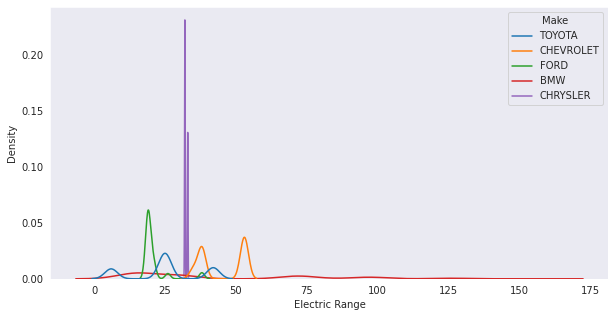

In [20]:
#lets filter out top 5 companies as per each electric vehicle type

#PHEV

data_phev = df[df['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']
companies=list(data_phev.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index)[:5]
data_phev['phe'] = data_phev['Make'].apply(lambda x:1 if x in companies else 0 )
data_phev = data_phev[data_phev['phe']==1]

plt.figure(figsize=(10,5))
sns.kdeplot(x='Electric Range',hue='Make',data=data_phev)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='Electric Range', ylabel='Density'>

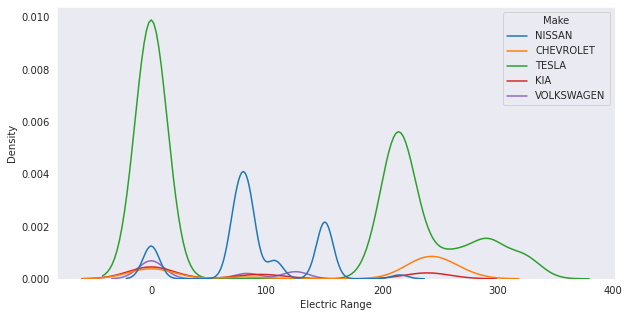

In [21]:
#BEV


data_bev = df[df['Electric Vehicle Type']!='Plug-in Hybrid Electric Vehicle (PHEV)']
companies=list(data_bev.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index)[:5]
data_bev['bev'] = data_bev['Make'].apply(lambda x:1 if x in companies else 0 )
data_bev = data_bev[data_bev['bev']==1]

plt.figure(figsize=(10,5))
sns.kdeplot(x='Electric Range',hue='Make',data=data_bev)

In [22]:
#if we remove zero ranges we can see CHEVERLET AND TESLA offering high ranges

In [23]:
#lets see top20 most sold cars and top20 most range giving vehicles and check if there is any correlation

In [24]:
top_10_vehicles = list(df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index)[:10]

In [25]:
top_10_range =  df.sort_values(by='Electric Range',ascending=False)['Model'].unique()[:10]

In [26]:
top_10_vehicles

['MODEL 3',
 'MODEL Y',
 'LEAF',
 'MODEL S',
 'BOLT EV',
 'VOLT',
 'MODEL X',
 'PRIUS PRIME',
 'NIRO',
 'I3']

In [27]:
top_10_range

array(['MODEL S', 'MODEL 3', 'MODEL X', 'MODEL Y', 'BOLT EV', 'KONA',
       'ROADSTER', 'NIRO', 'I-PACE', 'PS2'], dtype=object)

In [28]:
#6 out of top 10 most selling ones are in the top_10 electric range vehicles so range can be a reason of their sales

<AxesSubplot:xlabel='Model Year', ylabel='count'>

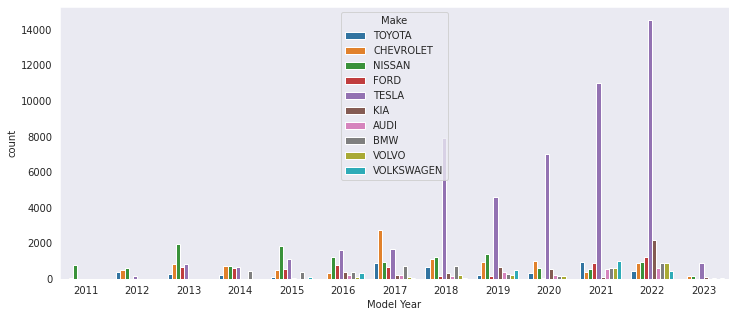

In [29]:
#Number of models of company for each year for last 10 years
#lets consider top_10 companies only

data = df.copy()
data['top_10'] = data['Make'].apply(lambda x:1 if x in top_10_companies else 0)
data = data[data['top_10']==1]
data = data[data['Model Year']>=2011]
plt.figure(figsize=(12,5))
sns.countplot(x = 'Model Year',hue='Make',data=data)

In [30]:
#earlier NISSAN and CHEVY used to have hold of the market then TESLA took over it 

In [31]:
#if we study an individual company TESLA
#1.which state is having more number of TESLA vehicles
#2.Model of which year is in use the most from TESLA

data_TESLA = df[df['Make']=='TESLA']
top_10_states_TESLA = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].values)[:10]

<AxesSubplot:>

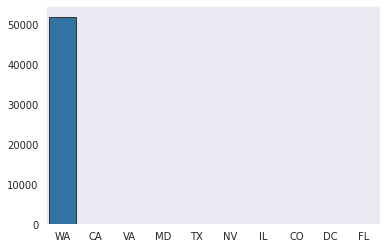

In [32]:
sns.barplot(x = top_10_states_TESLA,y=values,edgecolor='.2')

In [33]:
values

[51943, 39, 17, 10, 9, 5, 4, 4, 3, 3]

In [34]:
#Most of the Tesla vehicles are from 'WA' state

<AxesSubplot:>

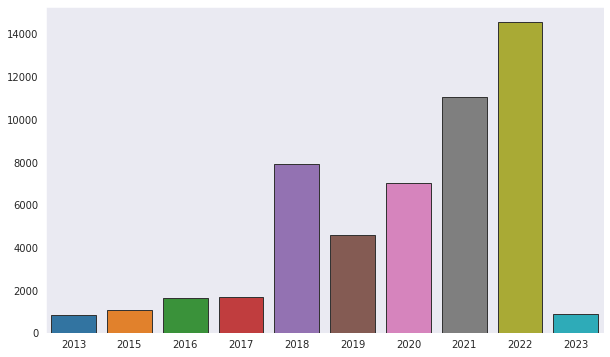

In [35]:
plt.figure(figsize=(10,6))
top_10_year_TESLA = list(data_TESLA.groupby('Model Year').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('Model Year').count().sort_values(by='City',ascending=False)['City'].values)[:10]
sns.barplot(x = top_10_year_TESLA,y=values,edgecolor='.2')

In [36]:
#most models are from 2022 which are sold by tesla

(20.0, 60.0)

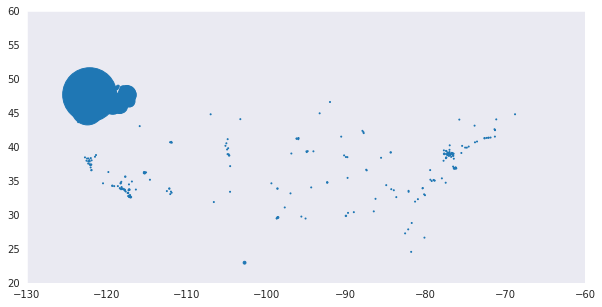

In [37]:
locations = list(df.groupby('Vehicle Location').count()['County'].index)
values = list(df.groupby('Vehicle Location').count()['County'].values)
Location_data = pd.DataFrame({'Locations':locations,'Count':values})
Location_data['Lattitude'] = Location_data['Locations'].apply(lambda x:float(x.split(' ')[1][1:]))
Location_data['Longitude'] = Location_data['Locations'].apply(lambda x:float(x.split(' ')[2][:-1]))

plt.figure(figsize=(10,5))
plt.scatter(x = Location_data['Lattitude'],y = Location_data['Longitude'],s=Location_data['Count'])
plt.xlim(-130,-60)
plt.ylim(20,60)

In [38]:
#Most data points are from 'WA' state

In [39]:
df['Lattitude'] = df['Vehicle Location'].apply(lambda x:float(x.split(' ')[1][1:]))
df['Longitude'] = df['Vehicle Location'].apply(lambda x:float(x.split(' ')[2][:-1]))

(20.0, 50.0)

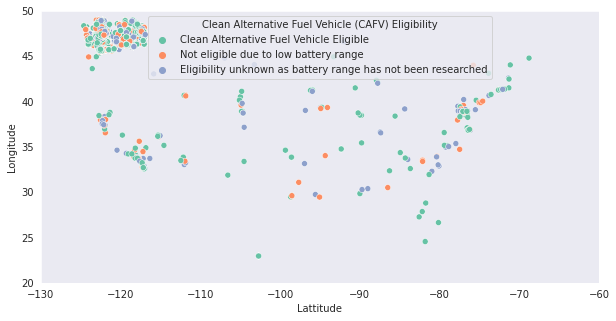

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Lattitude',y = 'Longitude',data=df,hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility',palette='Set2')
plt.xlim(-130,-60)
plt.ylim(20,50)

In [41]:
#density is more at certain regions of the map and distribution of CAFV can be seen

(20.0, 50.0)

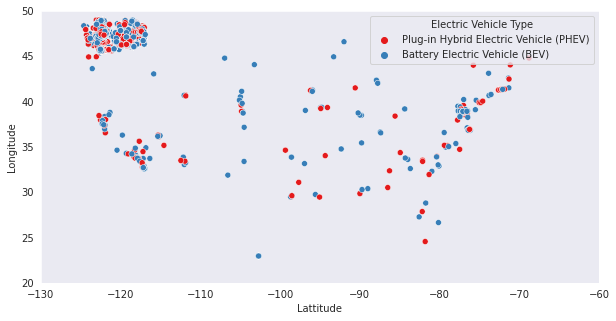

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Lattitude',y = 'Longitude',data=df,hue='Electric Vehicle Type',palette='Set1')
plt.xlim(-130,-60)
plt.ylim(20,50)

In [43]:
states = list(df.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)
values = df.groupby('State').count().sort_values(by='City',ascending=False)['City'].values

In [44]:
data = pd.DataFrame(df.groupby('State').count().sort_values(by='City',ascending=False)['City'])

In [45]:
data = data.reset_index()

In [46]:
data.columns = ['State','Count']

In [47]:
fig = px.choropleth(data,
                    locations='State', 
                    locationmode="USA-states", 
                    color='Count',
                    color_continuous_scale="greens", 
                    scope="usa")

fig.show()